In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = "input/"

wine = pd.read_csv(path + 'train.csv')
wine_test = pd.read_csv(path + 'test.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.8,0.63,0.24,2.4,0.078,6.1,32.6,0.9997,3.08,0.57,9.4,5.1
1,6.1,0.34,0.25,1.8,0.084,4.0,28.0,0.9941,3.36,0.44,10.2,4.8
2,7.1,0.43,0.17,1.8,0.083,27.2,51.3,0.9941,3.51,0.63,10.4,5.5
3,8.6,0.47,0.27,1.9,0.058,17.5,37.6,0.9907,3.16,0.85,11.1,6.1
4,6.9,0.41,0.30,8.9,0.084,25.9,45.4,0.9861,3.35,0.64,10.2,5.6


カラム名|説明
---|---
fixed acidity | 酒石酸濃度
volatile acidity | 酢酸濃度
citric acid | クエン酸濃度
residual sugar | 発酵後に残っている砂糖の量
chlorides | ワインに含まれる塩分量
free sulfur dioxide | 遊離二酸化硫黄の量
total sulfur dioxide | (すべての)二酸化硫黄の量
density | ワインの密度
pH | ワインのpH
sulphates | ワインに含まれる硫酸塩の量
alcohol | アルコールの度数
quality | ワインの評価

In [5]:
wine.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                 122
pH                      137
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [6]:
wine_test.isnull().sum()

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                 25
pH                      24
sulphates                0
alcohol                  0
dtype: int64

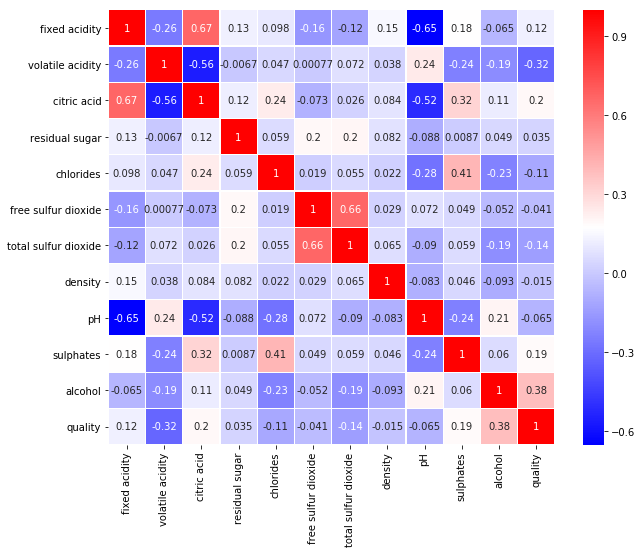

In [7]:
sns.heatmap(wine.corr(),annot=True,cmap='bwr',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1280.00000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1158.000000,1143.000000,1280.000000,1280.000000,1280.000000
mean,8.34125,0.527187,0.271383,2.549766,0.087614,15.599844,45.652812,0.997019,3.309405,0.658953,10.427813,5.614297
std,1.74115,0.181153,0.194353,1.452651,0.049233,10.482150,32.914044,0.010262,0.158249,0.175200,1.065322,0.987628
min,4.70000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.951600,2.720000,0.330000,8.400000,2.500000
25%,7.10000,0.390000,0.100000,1.900000,0.070000,7.000000,21.675000,0.990300,3.210000,0.550000,9.500000,4.900000
50%,8.00000,0.520000,0.260000,2.200000,0.079000,13.100000,36.800000,0.997350,3.310000,0.620000,10.200000,5.500000
75%,9.30000,0.640000,0.430000,2.600000,0.090250,20.925000,60.350000,1.003500,3.400000,0.730000,11.100000,6.300000
max,15.90000,1.610000,1.000000,15.500000,0.615000,71.800000,290.300000,1.029000,3.970000,2.050000,15.000000,9.700000


cat   cat 
0_4   0_4       38
4_7   4_7     1131
7_10  7_10     111
Name: cat, dtype: int64


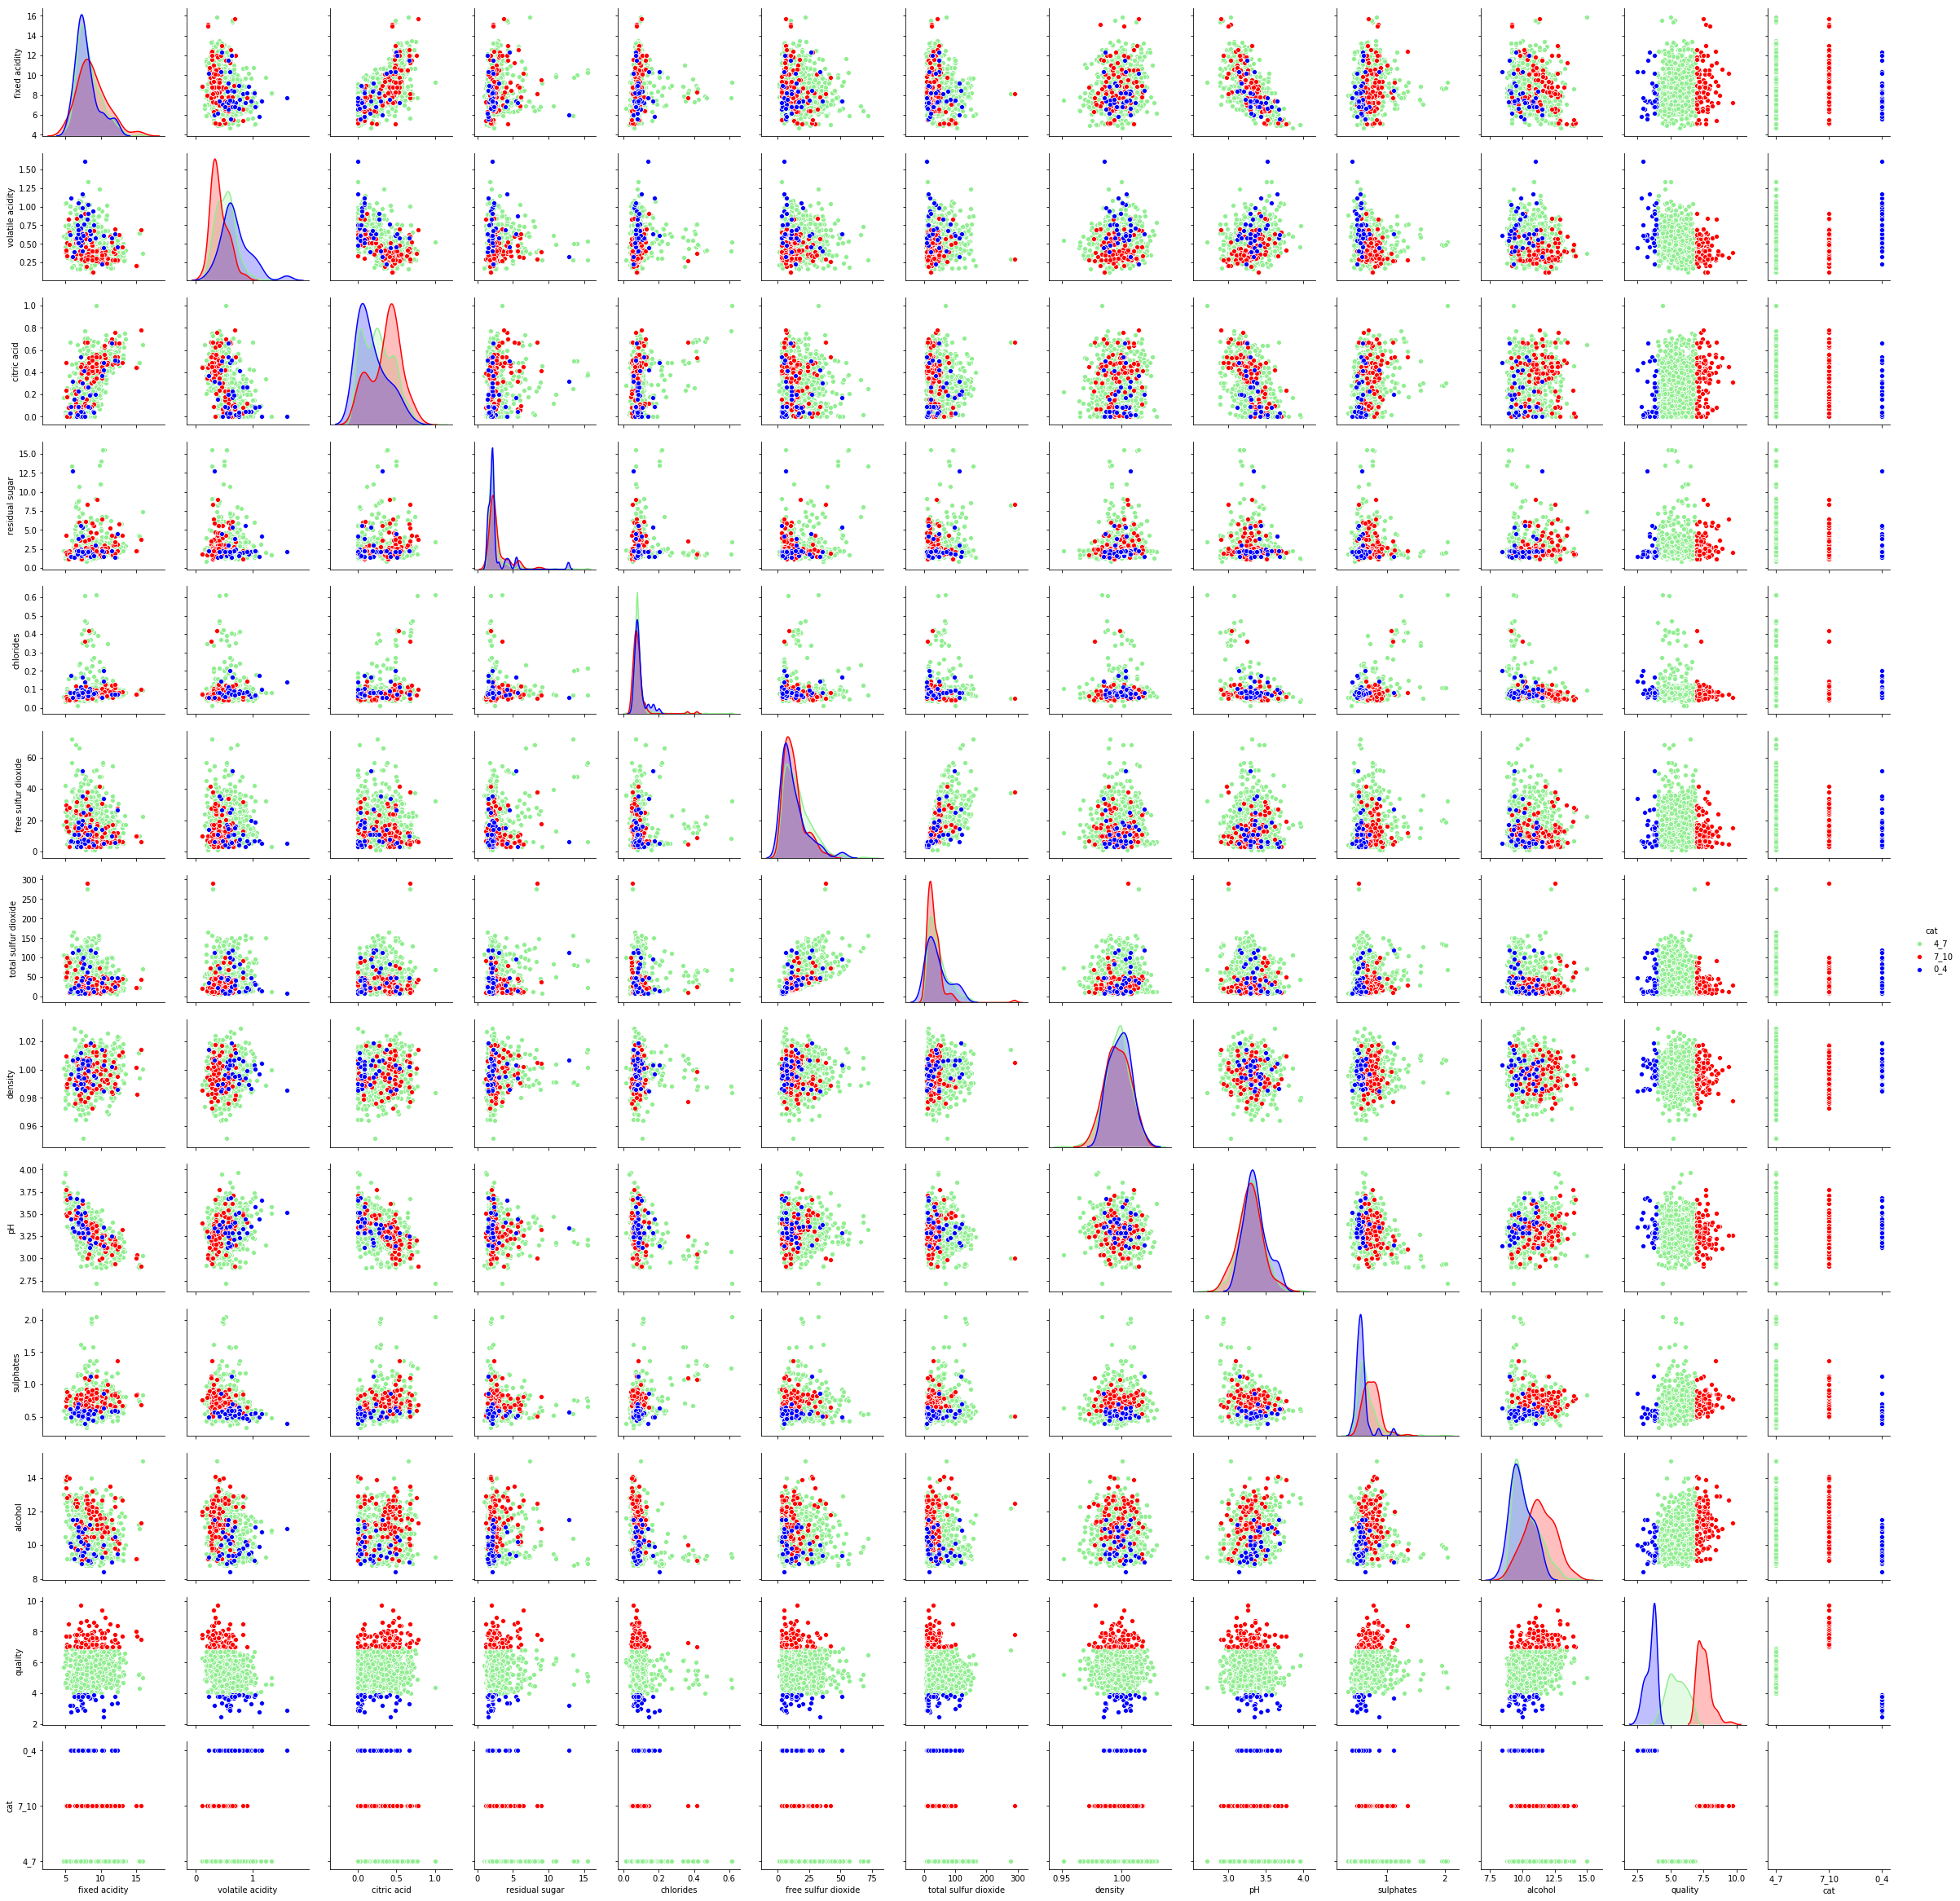

In [9]:
df_0 = wine.copy()
df_0['cat'] = '0_4'
df_0['cat'] = np.where(df_0['quality']<4, df_0['cat'], '4_7')
df_0['cat'] = np.where(df_0['quality']<7, df_0['cat'], '7_10')
print(df_0.groupby('cat')['cat'].value_counts())
sns.pairplot(df_0, hue = 'cat', hue_order=['4_7', '7_10', '0_4'], palette={'0_4': 'blue', '4_7': 'lightgreen', '7_10': 'red'})

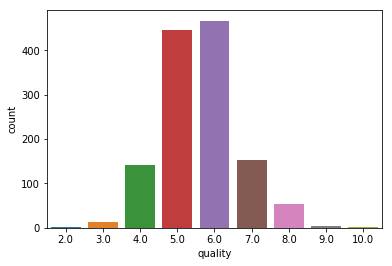

In [11]:
sns.countplot(x = round(wine['quality']), data = wine)